In [42]:
import pandas as pd
import numpy as np
import math
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
col_names = names = ["symboling", "normalized-losses", "make", "fuel-type",
                     "aspiration", "num-of-doors", "body-style", "drive-wheels",
                     "engine-location", "wheel-base", "length", "width", 
                     "height", "curb-weight", "engine-type", "num-of-cylinders",
                     "engine-size", "fuel-system", "bore", "stroke", "compression-ratio",
                     "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"
                    ]
cars = pd.read_csv("imports-85.data", names = col_names)

In [44]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [45]:
cars = cars.replace("?", np.nan)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    205 non-null float64
horsepower           203 non-nul

In [46]:
cars = cars.drop(["normalized-losses", "num-of-doors"], axis = 1)
cars[["peak-rpm", "horsepower", "price", "bore", "stroke"]] = cars[["peak-rpm", "horsepower", "price", "bore", "stroke"]].astype(float)
cars = cars.fillna(cars.mean())

In [47]:
def knn_train_test(col, df, k):
    for col_val in col:
        if df[col_val].dtype == "object":
            raise ValueError('The column isn\'t numeric')
        elif col_val not in df.columns:
            raise ValueError('The column doesn\'t exists')
    size = len(df)
    train_set = df[0: math.floor(size/3)]
    test_set = df[math.floor(size/3):]
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(train_set[col], train_set["price"])
    predictions = knn.predict(test_set[col])
    rmse = math.sqrt(mean_squared_error(test_set["price"], predictions))
    return rmse

In [48]:
def knn_train_test_single(col_val, df, k):
    if df[col_val].dtype == "object":
        raise ValueError('The column isn\'t numeric')
    elif col_val not in df.columns:
        raise ValueError('The column doesn\'t exists')
    col = [col_val]
    size = len(df)
    train_set = df[0: math.floor(size/3)]
    test_set = df[math.floor(size/3):]
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(train_set[col], train_set["price"])
    predictions = knn.predict(test_set[col])
    rmse = math.sqrt(mean_squared_error(test_set["price"], predictions))
    return rmse

In [49]:
import operator
numeric_cols = []
ks = [1, 3, 5, 7,9]
for col in cars:
    if cars[col].dtype != "object" and col != "price":
        numeric_cols.append(col)
rmses = dict()
krmse = {key: 0 for key in ks}
for col in numeric_cols:
    rmse_col = []
    for k in ks:
        temp_rmse = knn_train_test_single(col, cars, k)
        rmse_col.append(temp_rmse)
        krmse[k] = krmse[k] + temp_rmse
    rmses[col] = np.mean(rmse_col)
krmse_val = []
for key, val in krmse.items():
    krmse[key] = val/len(numeric_cols)
    krmse_val.append(krmse[key])
#plt.hist(krmse_val)
two_best_dict = dict(sorted(rmses.items(), key=operator.itemgetter(1), reverse=True)[:2])
three_best_dict = dict(sorted(rmses.items(), key=operator.itemgetter(1), reverse=True)[:3])
four_best_dict = dict(sorted(rmses.items(), key=operator.itemgetter(1), reverse=True)[:3])
five_best_dict = dict(sorted(rmses.items(), key=operator.itemgetter(1), reverse=True)[:4])

def append_to_list(list_name, dict_name):
    list_name = []
    for key in dict_name:
        list_name.append(key)
    return list_name
two_best = append_to_list(two_best, two_best_dict)
three_best = append_to_list(three_best, three_best_dict)
four_best = append_to_list(four_best, four_best_dict)
five_best = append_to_list(five_best, five_best_dict)

rmses_features = [] 
features_lists = [two_best, three_best, four_best, five_best]
for features in features_lists:
    rmse = knn_train_test(features, cars, 5)
    rmses_features.append(rmse)

print(rmses_features)

[9330.874485184971, 8767.490246496027, 8767.490246496027, 7918.375416178661]


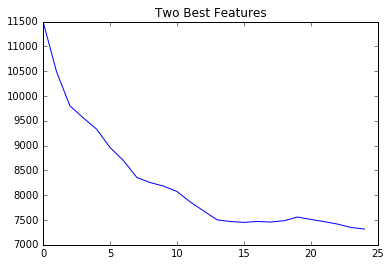

In [50]:
hyps = [x for x in range(1,26)]
rmses_features = []
for hyp in hyps:
    rmse = knn_train_test(two_best, cars, hyp)
    rmses_features.append(rmse)
plt.plot(range(0,25), rmses_features)
plt.title("Two Best Features")

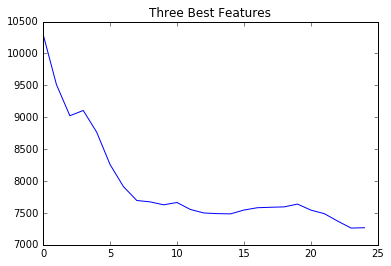

In [51]:
rmses_features = []
for hyp in hyps:
    rmse = knn_train_test(three_best, cars, hyp)
    rmses_features.append(rmse)
plt.plot(range(0,25), rmses_features)
plt.title("Three Best Features")

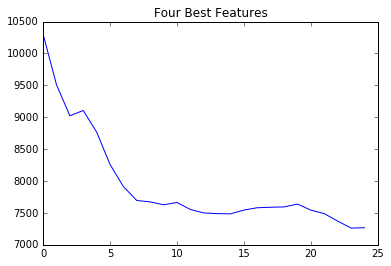

In [52]:
rmses_features = []
for hyp in hyps:
    rmse = knn_train_test(four_best, cars, hyp)
    rmses_features.append(rmse)
plt.plot(range(0,25), rmses_features)
plt.title("Four Best Features")

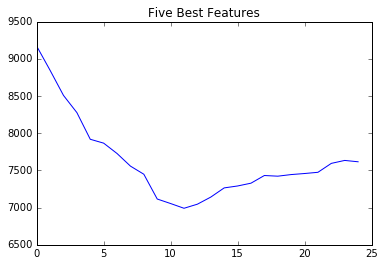

In [54]:
rmses_features = []
for hyp in hyps:
    rmse = knn_train_test(five_best, cars, hyp)
    rmses_features.append(rmse)
plt.plot(range(0,25), rmses_features)
plt.title("Five Best Features")

### TODOD
Modify the knn_train_test() function to use k-fold cross validation instead of test/train validation.  
Modify the knn_train_test() function to perform the data cleaning as well. This function should be general enough so that any data set can be passed in and the best model will be returned.  